# Prediction of Apple Quality

Importing the Data & the Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
path = 'C:/Users/LENOVO/Desktop/Data Analysis Projects/CodeNucleus/Assignments/apple_quality.csv'
df = pd.read_csv(path)
df

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good
...,...,...,...,...,...,...,...,...,...
3996,3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,good
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,bad
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,good
3999,3999.0,0.278540,-1.715505,0.121217,-1.154075,1.266677,-0.776571,1.599796456,good


we need to drop the last row

In [3]:
df.drop(index=4000, inplace=True)
df

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good
...,...,...,...,...,...,...,...,...,...
3995,3995.0,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784369,bad
3996,3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,good
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,bad
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,good


In [4]:
df.shape

(4000, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4000 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 312.5+ KB


No null values are present  
Two columns are of object data type ie Acidity & Quality

In [6]:
# Typecasting of Acidity column
df.Acidity = df.Acidity.astype('float')

In [7]:
df.Acidity

0      -0.491590
1      -0.722809
2       2.621636
3       0.790723
4       0.501984
          ...   
3995    0.137784
3996    1.854235
3997   -1.334611
3998   -2.229720
3999    1.599796
Name: Acidity, Length: 4000, dtype: float64

In [8]:
df.Quality.value_counts()

good    2004
bad     1996
Name: Quality, dtype: int64

In [9]:
# Encoding Quality Good & Bad as 1 and 0
df.Quality = df.Quality.map({'good':1, 'bad':0})

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
A_id,4000.0,1999.500000,1154.844867,0.000000,999.750000,1999.500000,2999.250000,3999.000000
Size,4000.0,-0.503015,1.928059,-7.151703,-1.816765,-0.513703,0.805526,6.406367
Weight,4000.0,-0.989547,1.602507,-7.149848,-2.011770,-0.984736,0.030976,5.790714
Sweetness,4000.0,-0.470479,1.943441,-6.894485,-1.738425,-0.504758,0.801922,6.374916
Crunchiness,4000.0,0.985478,1.402757,-6.055058,0.062764,0.998249,1.894234,7.619852
Juiciness,4000.0,0.512118,1.930286,-5.961897,-0.801286,0.534219,1.835976,7.364403
Ripeness,4000.0,0.498277,1.874427,-5.864599,-0.771677,0.503445,1.766212,7.237837
Acidity,4000.0,0.076877,2.110270,-7.010538,-1.377424,0.022609,1.510493,7.404736
Quality,4000.0,0.501000,0.500062,0.000000,0.000000,1.000000,1.000000,1.000000


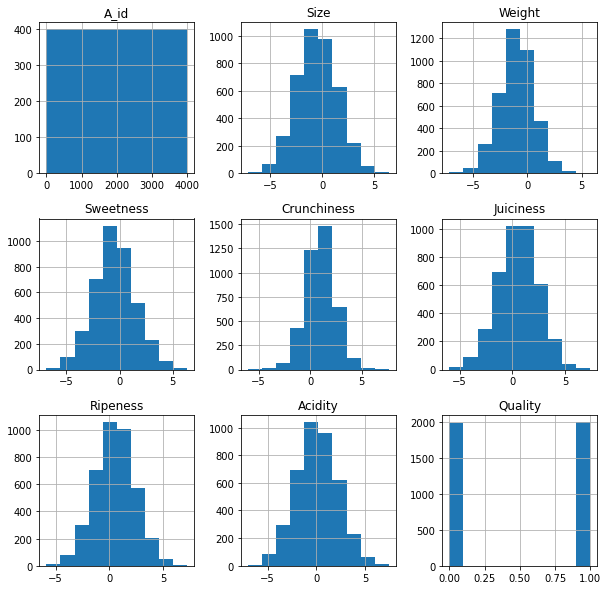

In [11]:
df.hist(figsize=(10,10));

In [12]:
# A_id is basically the labels
# Quality is the target variable
# Rest all the features are uniformly distributed

In [13]:
# we will drop the A_id column as it is not required for modelling
df.drop(columns='A_id', inplace=True)
df.head(2)

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.32984,-0.491590,1
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.86753,-0.722809,1


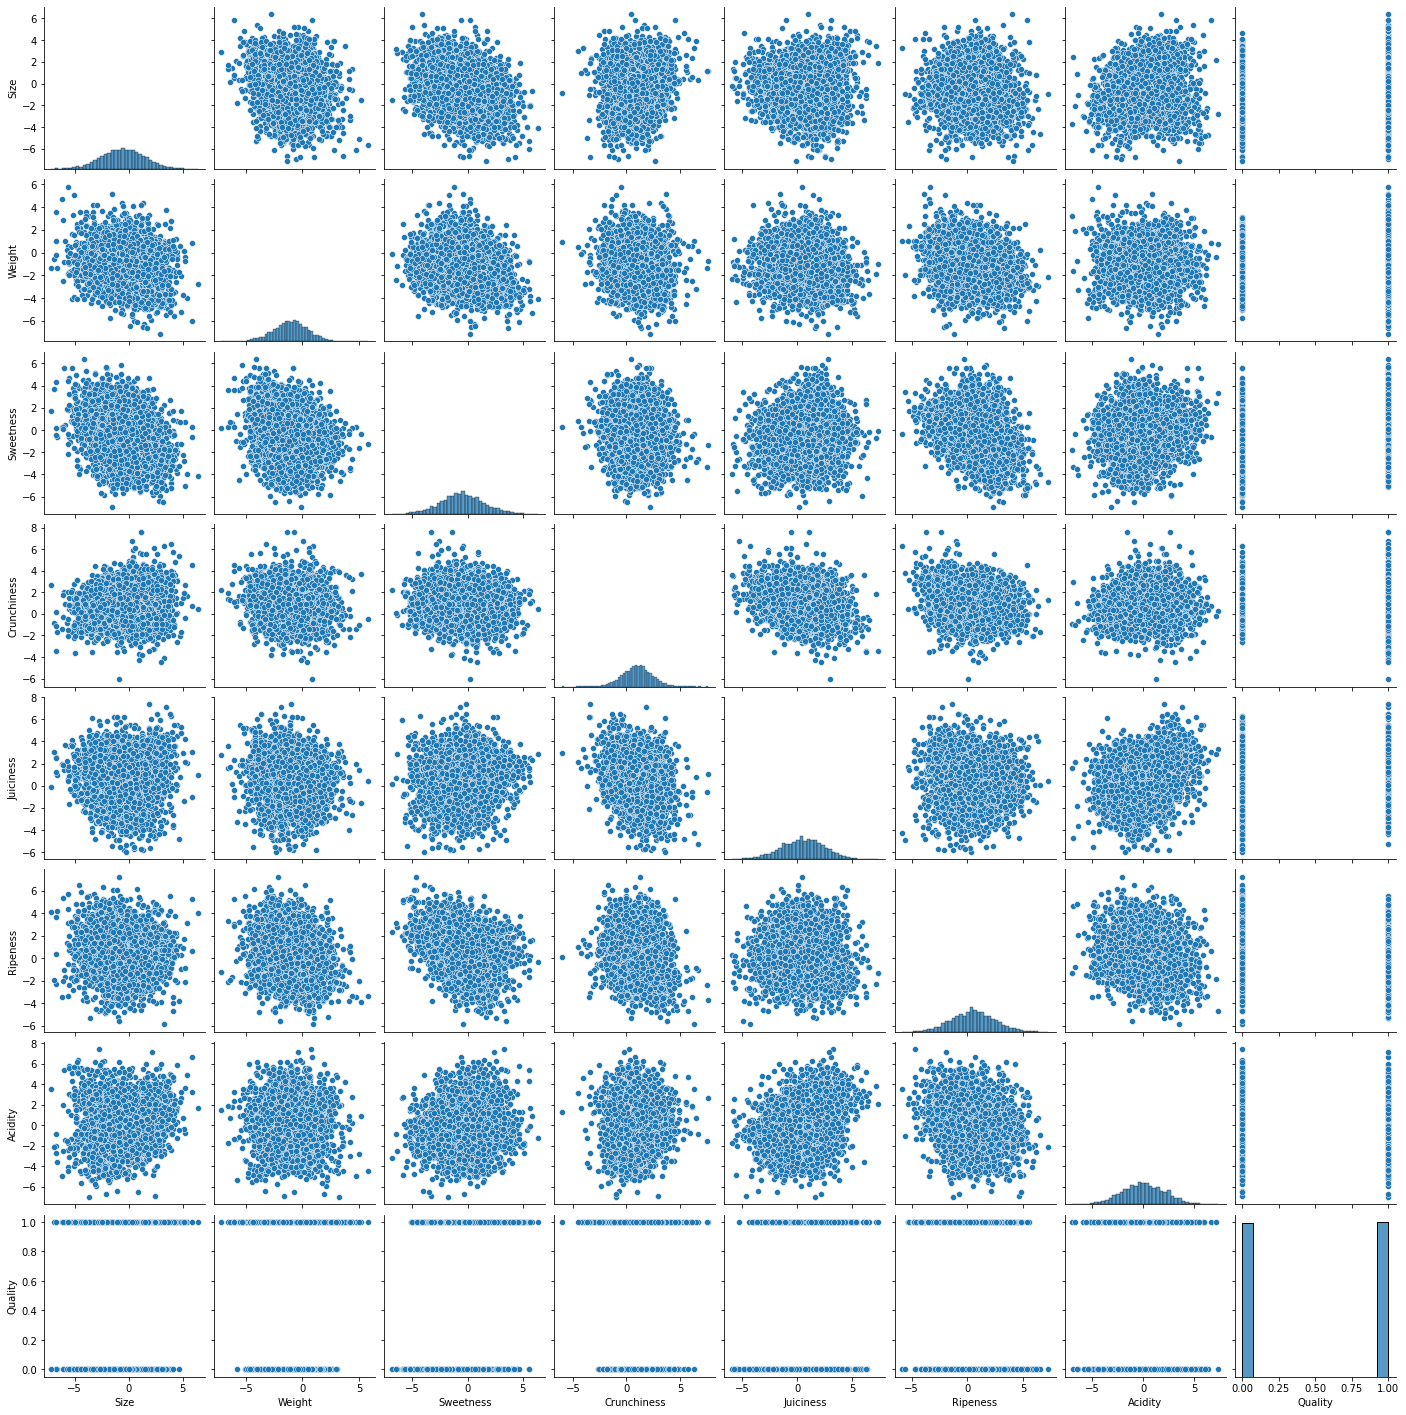

In [14]:
sns.pairplot(df);

In [15]:
# No clear identification using pairplot

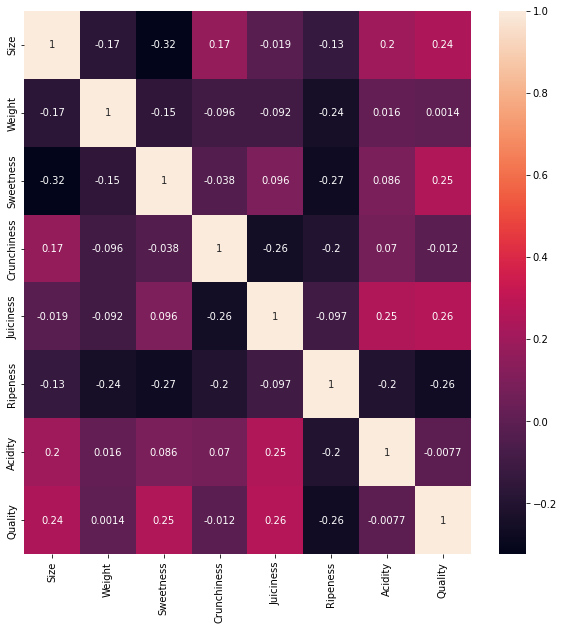

In [16]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True);

# Splitting & learning from data

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
# we will split the data in input and output for training
X = df.iloc[:,:-1]
X.head()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984


In [19]:
y = df.Quality
y.head()

0    1
1    1
2    0
3    1
4    1
Name: Quality, dtype: int64

In [20]:
train_inp, test_inp, train_out, test_out = train_test_split(X, y, train_size=0.8,
                                                            random_state=27)

In [21]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB

In [22]:
gnb = GaussianNB()

In [23]:
gnb.fit(train_inp, train_out)

GaussianNB()

In [24]:
gnb.score(train_inp, train_out)*100

75.21875

In [25]:
gnb.score(test_inp, test_out)*100

74.25

In [26]:
df.head(3)

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,1
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,1
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,0


In [27]:
# prediction with random values
gnb.predict([[-1.5,-2.6,3.8,0,1.6,0.5,0.5]])

array([1], dtype=int64)

In [28]:
# we will Feature scale the inputs by StandardScaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [29]:
new = sc.fit_transform(X)

In [30]:
X_new = pd.DataFrame(new, columns=X.columns)
X_new.head()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
0,-1.798424,-0.950373,2.993421,-1.424150,0.690545,-0.089872,-0.269415
1,-0.359060,-1.154404,2.127698,0.429746,0.176767,0.197020,-0.378997
2,0.109445,-0.225759,-0.652507,-0.946892,1.205422,-0.286156,1.206044
3,-0.079977,-0.800146,0.923916,-0.772399,1.619575,-2.087320,0.338315
4,0.968573,-0.191640,0.044164,-1.096894,1.305025,-0.961548,0.201472


In [31]:
X_new.describe().T

,count,mean,std,min,25%,50%,75%,max
Size,4000.0,4.440892e-17,1.000125,-3.448816,-0.681470,-0.005544,0.678768,3.584043
Weight,4000.0,-1.154632e-17,1.000125,-3.844645,-0.637970,0.003002,0.636909,4.231561
Sweetness,4000.0,-3.019807e-17,1.000125,-3.305895,-0.652505,-0.017641,0.654797,3.522747
Crunchiness,4000.0,1.421085e-17,1.000125,-5.019697,-0.657868,0.009106,0.647917,4.730115
Juiciness,4000.0,-2.708944e-17,1.000125,-3.354335,-0.680504,0.011451,0.685921,3.550325
Ripeness,4000.0,-3.552714e-18,1.000125,-3.394996,-0.677601,0.002757,0.676523,3.595980
Acidity,4000.0,-2.131628e-17,1.000125,-3.358956,-0.689240,-0.025720,0.679437,3.472909


In [32]:
gnb.fit(X_new,y)

GaussianNB()

In [33]:
gnb.score(X_new,y)*100

75.14999999999999

In [34]:
# Standard Scaling has not improved performance in this case

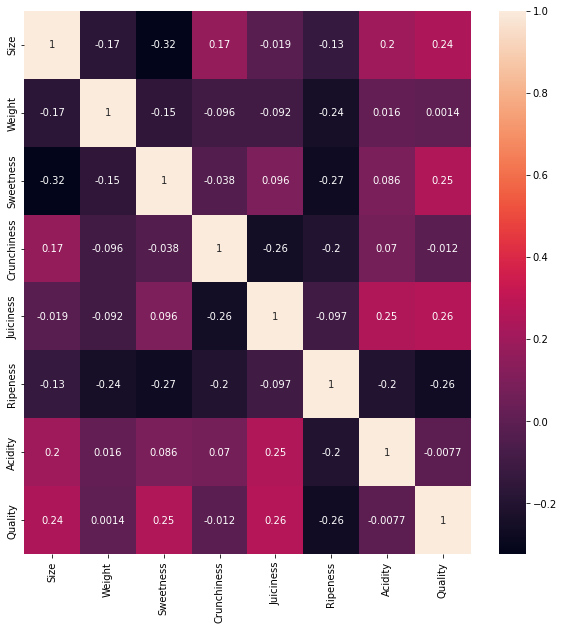

In [35]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True);

In [36]:
# as size, sweetness & juiceness seem to be interlinked, we will drop one column to avoid multicollinearity
X.drop(columns='Sweetness', inplace=True)

In [37]:
gnb.fit(X, y)

GaussianNB()

In [38]:
gnb.score(X, y)*100

72.275

## Although we have Standard Scaled the features, dropped interlinked columns, the goodness of data is between 70 to 75%, need to check other methods for model performance improvement